## Create Yelp subset with users that wrote 50-100 reviews to reduce dataset size from 3.6B records

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
filename = 'yelp_review.csv'
filepath = os.path.join('..','yelp_dataset',filename)
reviews_data_df = pd.read_csv(filepath)
filename = 'restaurants.csv'
filepath = os.path.join(filename)
restaurant_data_df = pd.read_csv(filepath)
restaurant_data_df.rename(columns={'stars':'overall_stars'},inplace=True)
business_and_review = restaurant_data_df.merge(reviews_data_df,on='business_id')

review_df_with_count = business_and_review[
    ['name','review_id','user_id','business_id','stars','text','date']\
    ].merge(business_and_review[['user_id','stars']]\
            .rename(columns={'stars':'review_count'})\
            .groupby('user_id')\
            .count(),left_on = 'user_id',right_index=True)

In [6]:
# review_df_with_count[
#         (review_df_with_count['review_count']>lower) & \
#         (review_df_with_count['review_count']<=upper)]

rating distribution of reviews from users with 0 to 1 reviews written
518291 reviews in subset


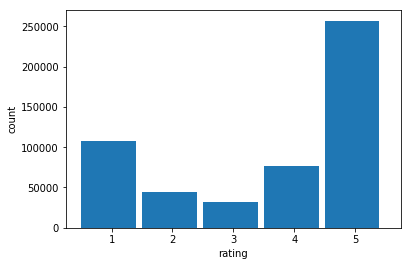

rating distribution of reviews from users with 1 to 30 reviews written
2129629 reviews in subset


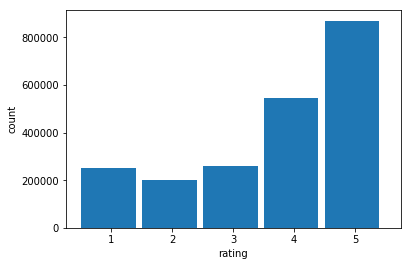

rating distribution of reviews from users with 30 to 50 reviews written
274066 reviews in subset


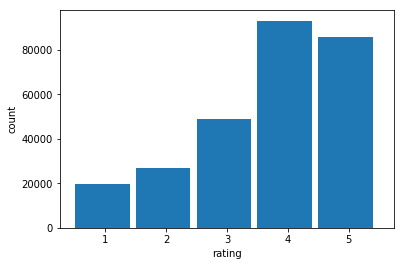

rating distribution of reviews from users with 50 to 100 reviews written
323310 reviews in subset


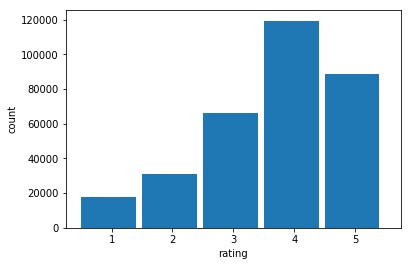

rating distribution of reviews from users with 100 to 1000 reviews written
382571 reviews in subset


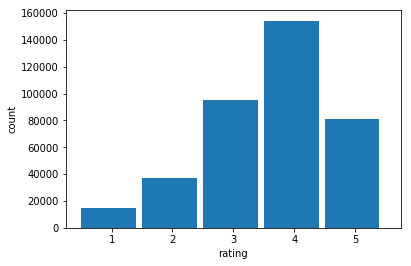

In [8]:
# import matplotlib.pyplot as plt
thresholds = [0,1,30,50,100,1000]
for n in range(len(thresholds)-1):
    upper = thresholds[n+1]
    lower = thresholds[n]
    print(f'rating distribution of reviews from users with {lower} to {upper} reviews written')
#     upper_filter = review_df_with_count['review_count']>lower
#     lower_filter = review_df_with_count['review_count']<=upper
    reviews = list(review_df_with_count[
        (review_df_with_count['review_count']>lower) & \
        (review_df_with_count['review_count']<=upper)]['stars'])
    print(f'{len(reviews)} reviews in subset')
    plt.hist(reviews,bins=[x+0.5 for x in range(6)],align='mid',width=0.9)
    plt.xlabel('rating')
    plt.ylabel('count')
    plt.show()

In [12]:
upper = 100
lower = 50
reviews_50_100 = review_df_with_count[
        (review_df_with_count['review_count']>lower) & \
        (review_df_with_count['review_count']<=upper)]
reviews_50_100['word_count'] = reviews_50_100.text.apply(lambda x: len(str(x).split(' ')))

/Users/Maciel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [14]:
reviews_50_100.describe()

,stars,review_count,word_count
count,323310.000000,323310.000000,323310.000000
mean,3.712227,71.869240,138.944632
std,1.131043,14.220856,112.224736
min,1.000000,51.000000,1.000000
25%,3.000000,59.000000,61.000000
50%,4.000000,70.000000,109.000000
75%,5.000000,83.000000,182.000000
max,5.000000,100.000000,1124.000000


In [15]:
reviews_50_100

,name,review_id,user_id,business_id,stars,text,date,review_count,word_count
23,"""Brick House Tavern + Tap""",ZflgoahrEd1_H0tWSATjQw,KgQnRvsPSrJJTOCp-reYZA,PfOCPjBrlQAnz__NXj9h_w,4,Eating on couches or lounging in comfy recline...,2016-02-27,57,127
224012,"""Whole Foods Market""",JjJyUhnLtX5aZWVJfSeLKA,KgQnRvsPSrJJTOCp-reYZA,NFv21m2Czqz2XM5G4kpbKg,3,"Convienent easy parking, though I had to avoid...",2016-12-27,57,128
542595,"""Crave Cantina""",hQu_gojfKPm8C0yovoszhQ,KgQnRvsPSrJJTOCp-reYZA,OFaMjL9nLF-A51KHNW8nfg,5,I usually go somewhere local twice before writ...,2017-07-01,57,190
550696,"""Newdle Bar""",0n1w0w1VsRF4eqeqZHnX4g,KgQnRvsPSrJJTOCp-reYZA,XHK_1UM4CBZQ7RemDFr1mQ,3,Meh...don't come here if you are looking for a...,2016-08-11,57,98
579958,"""Cornerstone Market & Deli""",PAldTKppEliQBy3M5vxtlg,KgQnRvsPSrJJTOCp-reYZA,eZ423jsTh3g9QTt2w-UTyg,5,This place is a gem...I was so glad they reope...,2016-08-17,57,106
602268,"""Yum Yum Sweet Shop""",r8ghBuwFFMybBGFcDVv6Ow,KgQnRvsPSrJJTOCp-reYZA,RaAF9t0_Epbov-1uHfDiXg,4,Step back in time and stay in the present all ...,2016-10-18,57,67
662398,"""Kintaro Sushi & Hot Pot""",PTldCrPlj6FbJnekNNQLDQ,KgQnRvsPSrJJTOCp-reYZA,PJ8VJqsTdJno0beARzaTrQ,4,I have been twice for lunch hotpot and dinner ...,2017-02-21,57,121
683087,"""PIZZAFIRE""",I1NMsaLQXLQRFEJwkx2eQA,KgQnRvsPSrJJTOCp-reYZA,5m_xSthxwPoR-XvJvtTeNQ,5,This restaurant grows their own herbs and lett...,2016-02-24,57,114
710074,"""Lemongrass Grill""",moFCqVwlzeUE4em5P0tynQ,KgQnRvsPSrJJTOCp-reYZA,06LmLcjFUb6b1HmhNllJZg,5,We will be back here really soon!\n\nOur servi...,2016-09-26,57,97
832747,"""Bowl Of Pho""",oEa4Csf_LjOQHiwRaYfuqg,KgQnRvsPSrJJTOCp-reYZA,zzSYBWuv_fXGtSgsO-6_1g,3,Came in due to recommendations and the large a...,2016-12-27,57,92


In [16]:
reviews_50_100.to_csv('reviews_users_50-100.csv',index = False)